# Building a Recommender System for Similar Holiday Destinations Based on Climate, Population, Cost and Venue Data

Morgan Thomas

### 1. Introduction

#### Background
Travel and tourism is not only a common part of an individuals lifestyle in the 21st Century, but is also vital for the success of many economies around the world. It boosts economic revenue, creates thousands of jobs, develops the infrastructures of a country, and plants a sense of cultural exchange between foreigners and citizens. With the COVID-19 pandemic, this industry has taken a massive hit due to travel restrictions. Therefore the industry will be looking for new ways to reinvigorate itself when travel becomes feasible again.


#### Problem
Many holiday-goers have specific tastes in terms of holiday destinations that they enjoy and do not enjoy. Some people may also be reluctant to revist the same destination twice in order to gain new experiences. Therefore, we aim to build a model to cluster world-cities using cultural, climate, cost and geographical data, in order to build a recommender system to suggest new holiday destinations.


#### Audience
This model may have many different potential audience. First of all the consumer, looking for a new travel experience they are likely to enjoy. Secondly, this model would be useful for travel groups to recommend and target advertisements to the consumers. Lastly, countries whose economies are dependent on tourism or would like to boost their travel and tourism industry could also benefit from this system by targetting consumers who have visited similar destinations.





### 2. Data
To build this model we will firstly need a list of popular tourism destinations. For this project we will stick to popular world cities for ease of access of data. Foursqaure API will provide venue information of a city, as in previous labs, and we will use this as a psuedo-read-out of a city's 'culture'. To use Foursqaure's API, we will need co-ordinates of each city. For climate data we will only use average temperature, max and min temperatures as this informations is readily available, weather data would also be desirable but typical weather data is not easily accessible. Lastly we will use a cost-of-living dataset in order to compare holiday budget readouts. The final cities used will be those contained in all datasets, limited to a maximum of 250 to save Foursquare calls and processing time. 

#### Dataset 1: City data
This Dataset contains demographic details of about 15,000 cities around the world. The name, co-ordinates and population of the cities, obtained from simplemaps.com

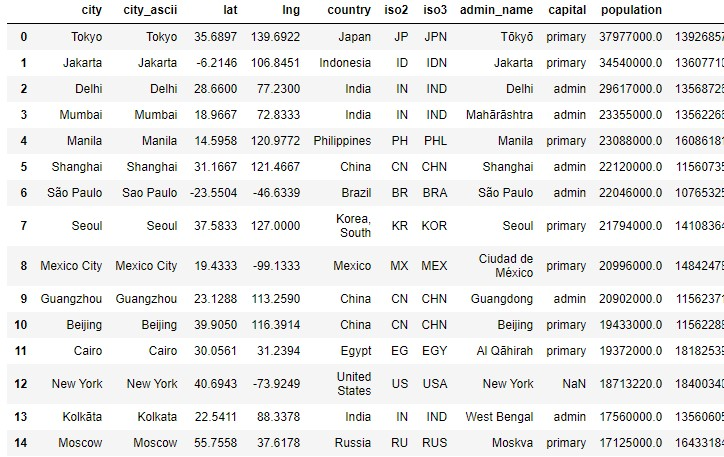

#### Dataset 2: Venue data
For this I will be using the Foursqaure API, as in previous labs.

#### Dataset 3: Temperature data
This Dataset is obtained from ERA5 reanalysis data from Copernicus Climate Service. It contains temperature time-series in degrees Celsius, for 1000 most populous cities in the world, from Jan-01-1980 to Sept-30-2020. We will take the average temp over these years, and also min and max values.

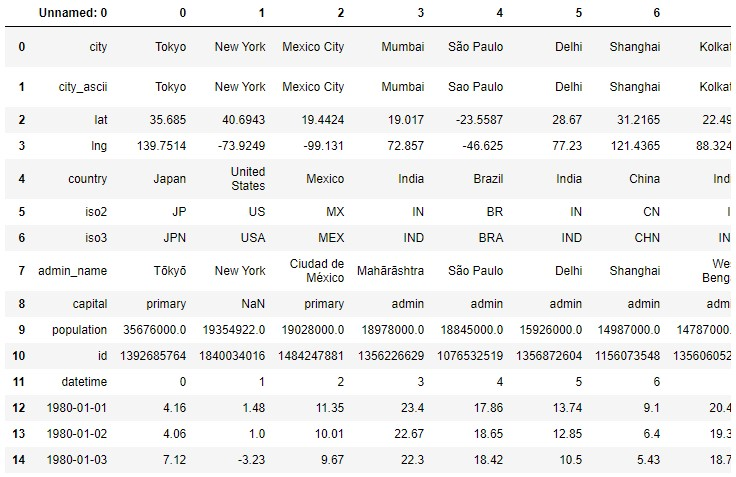

#### Dataset 4: Cost of living data
This containes multiple cost of living indices, relative to New York City (NYC). We will only use rent index as typical for accomodation costs, groceries index as typical for consumable spending and lastly, resteraunt index as 'eating-out' is common when travelling.

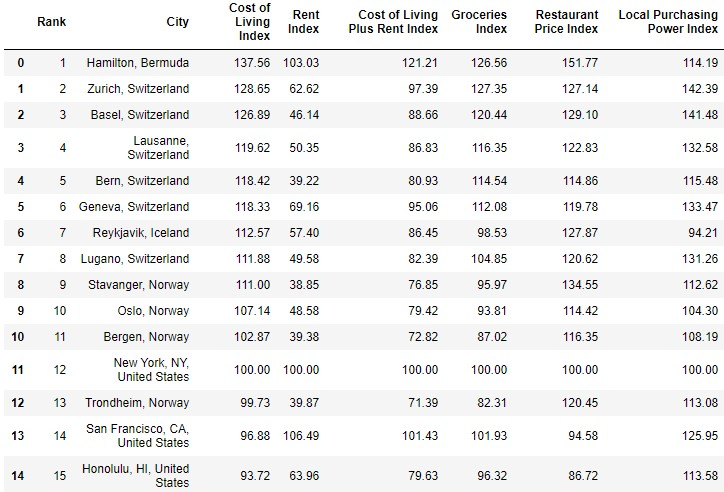

### 3. Methodology

#### 3.1 Data Cleaning

* Removed unnecessary columns from cities dataframe, keeping city name, co-ordinates and population
* Transposed temperature data frame and calculated average, max and min temperatures for entire period, and removed all other remaining columns
* Removed unnecessary columns from cost of living datframe
* Merged these dataframe by City name and dropped any rows containing NAs. This left 287 cities that were contained in all three data sets.

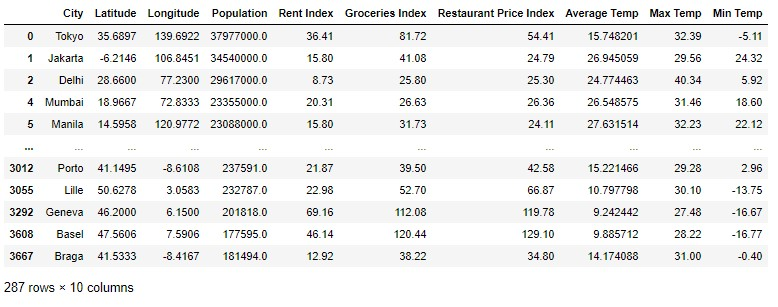

#### 3.2 Exploratory analysis

At this point I did some basic exploratory analysis by producing a simple correlation matrix between each feature. Interestingly, average and min temp correlated with latitude as expected but max temp less so. All cost of living indexes correlated as we would expect, I also imagined that these would correlate with population, but this is not the case.

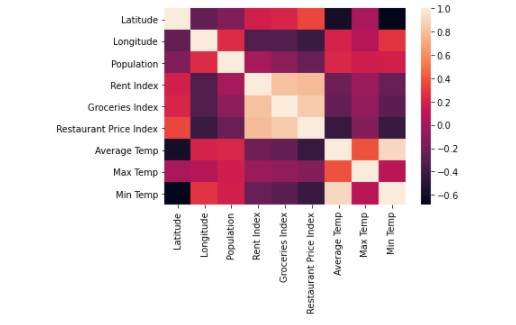

I then plotted the cities in my dataset onto a Folium map to ensure we had good global coverage remaining.

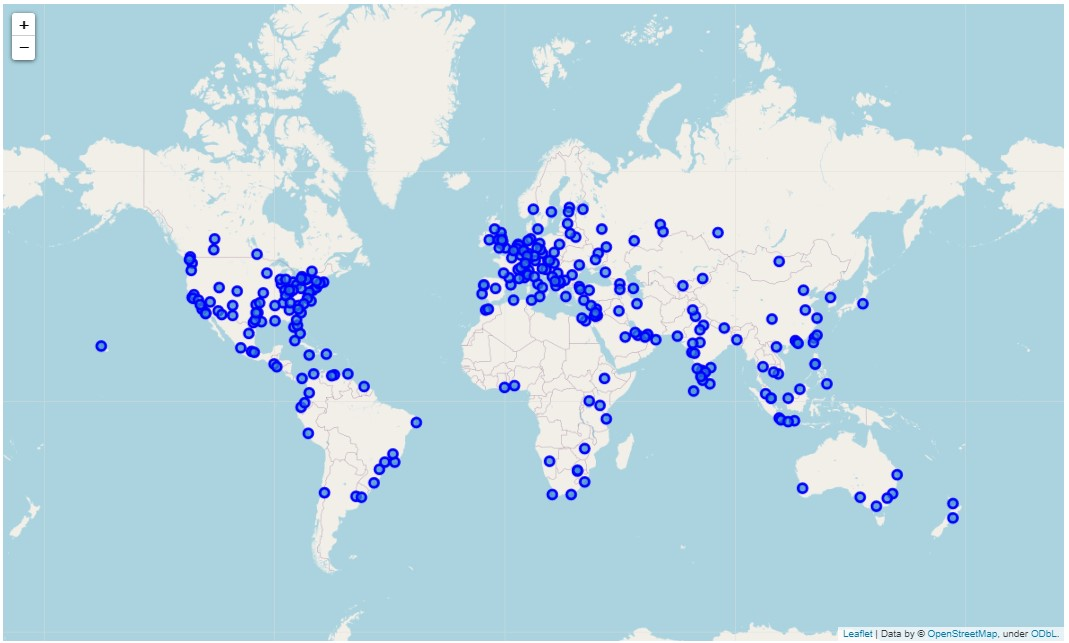

#### 3.3 Foursquare Data Acqusition and Processing

Using the Foursquare API I made calls to retrieve venue information for a relatively large radius for each of the cities in my dataset. Following this I used one-hot coding for each of the 611 different venue types acquired for each city and took the mean of each column when grouping by city. I then appended this to my previous dataset; ready for clustering.

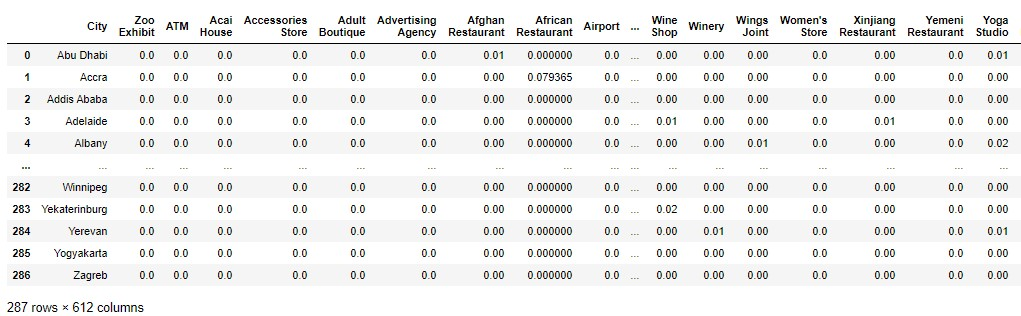

#### 3.3 Clustering analysis

I chose to use K-means clustering because I want to find and define groups which have not been explicitly labeled in the data. K-Means is also computationally faster than hierarchical clustering and also produces tighter clusters, especially if the clusters are globular
I began by attempting to find the elbow point for the optimal value of k-for k-means clustering.

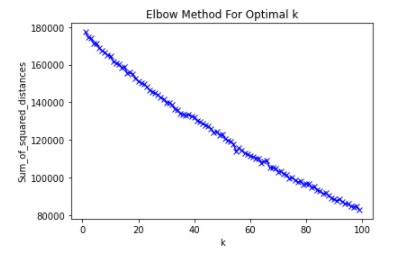

As you can see there is no obvious elbow point right up until k = 100. I assumed that this was because I have such a large number of features as without the ~600 venue features there was a clear elbow point at ~6 or 7 k. Therefore I reduced the dimensionality with a PCA and tried again.

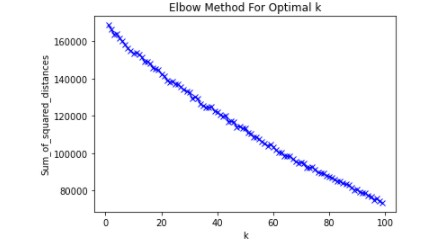

This dimentionality reduction also did not produce an obvious elbow point and so I arbitrarily chose a value for k that appeared to make half-decent clusters when plotted on the map.

#### 3.3 Nearest Neighbor

Obviously the main goal of this report was to produce a recommender system for similar holiday destinations, therefore I produced a simple function using k-nearest-neighbor to find data points with the n nearest cities via euclidean distance from a given city.

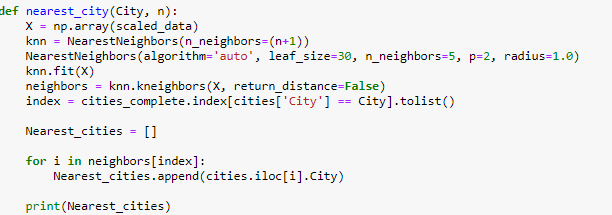

Simply entering a string value for the city you liked and it will compute the n number of cities that are closest to it using k-nearest neighbors.

### 4. Results

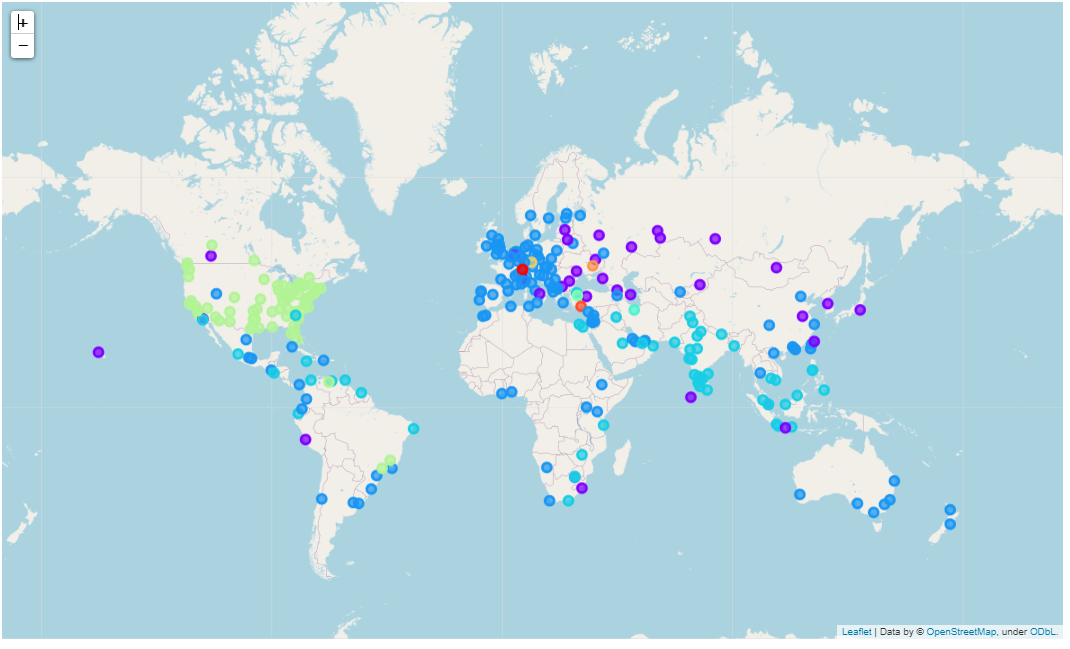

All of our cities are plotted on the map above and coloured by their assigned cluster. As you can see geographically the clusters are seperated which is pleasing to see as no geographical co-ordinate data is fed into the clustering algorithm. 

As for the recommender system, simply entering 'Tokyo' into the function with 3 nearest neighbors produces the following output:

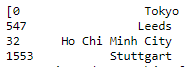

So, if you fancy a trip to tokyo just go to Leeds.

### 5. Discussion

As we can see the clusters diffentiate geographically without explicit co-ordinate data. We can see some latitude colouring, likely due to the inclusion of temperature. However, despite this we do see some clear seperation of climate-similar cities such as NA vs Eastern Asia and Europe vs. Eastern Europe/Russia. This suggests that the cost-of-living and venue data are capable of seperating cities that are similar. 

This being said there is obviously a lot of error in this model as Leeds and Tokyo are obviously not more simialr to eachother than any other city. Firstly inclusion of additional variables such as language, costal, weather etc.. would be essential not just to accuratley cluster but also are important features when recommending holiday destinations. Also, there were way too many venue features included; this is due to things like wine bars having different names in different places e.g winery vs. wine bar. Manual reduction of this data could be done but I could not be arsed I'll be honest.

Furthermore here we are using only world cities and far from all of them. We could further include all holiday destinations such as national parks or even towns/villiages. To build a better recommender system it would be ideal to have holiday information of different people with a rating system rather than data about destinations, and cluster similar to how netflix recommends films.

### 6. Conclusion

In conclusion we have built a recommender system for holiday destinations by clustering cities together based on climate, cost, population and venue information. Although there is obvious error in the model its a proof of concept that this may be possible given better and more relevant data.